<a href="https://colab.research.google.com/github/Skriller18/NIRF-Ranking_Analysis/blob/main/STATS_EL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Distribution of scores of 2023, 2022, 2021, 2020 and 2019 of all the institutes. Plot all of these scores. Find the mean of these scores and do analysises and find mean score by taking mean of the means of all years.
#Same thing do for all of the attributes of TLR, RPC, GO, OI and PERCEPTION and tell which institute has highest and lowest, what is average score, where does RV stand in these scores.
#Segregate for the IITs and NITs and other institutes and see how each is doing good in what aspect and how each has its own pros and cons
#Segregate according to the cities and see which city has what highest score.

#First joining the two excel sheets to get one excel sheets
#Excel Sheets uploaded on colab Drive.


In [ ]:
#SLIDES PRESENTATION:
'''1)Min,max and all violin plots of all parameters(4)
2)Correlation analysis(2)
3)Comparison between IIT,NIT and other institutes(2)
5)Normalisation and prediction/confidence interval(1)'''

'1)Min,max and all violin plots of all parameters(4)\n2)Correlation analysis(2)\n3)Comparison between IIT,NIT and other institutes(2)\n5)Normalisation and prediction/confidence interval(1)'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import numpy as np
import scipy.stats as st

# Load the data from the CSV file
file_path1 = '/content/2019_NIRF_EngineeringRanking.csv'
file_path2 = '/content/2020_NIRF_EngineeringRanking.csv'
data1 = pd.read_csv(file_path1)
data2 = pd.read_csv(file_path2)

In [ ]:
data1 = data1.rename(columns={
    'Institute ID': 'institute_id',
    'Score_2023': 'score_2023',
    'Rank_2023': 'rank_2023',
    'TLR (100)_2023': 'tlr_2023',
    'RPC (100)_2023': 'rpc_2023',
    'GO (100)_2023': 'go_2023',
    'OI (100)_2023': 'oi_2023',
    'PERCEPTION (100)_2023': 'perception_2023',
    'Score_2022': 'score_2022',
    'Rank_2022': 'rank_2022',
    'TLR (100)_2022': 'tlr_2022',
    'RPC (100)_2022': 'rpc_2022',
    'GO (100)_2022': 'go_2022',
    'OI (100)_2022': 'oi_2022',
    'PERCEPTION (100)_2022': 'perception_2022',
    'Score_2021': 'score_2021',
    'Rank_2021': 'rank_2021',
    'TLR (100)_2021': 'tlr_2021',
    'RPC (100)_2021': 'rpc_2021',
    'GO (100)_2021': 'go_2021',
    'OI (100)_2021': 'oi_2021',
    'PERCEPTION (100)_2021': 'perception_2021',
    'Score_2020': 'score_2020',
    'Rank_2020': 'rank_2020',
    'TLR (100)_2020': 'tlr_2020',
    'RPC (100)_2020': 'rpc_2020',
    'GO (100)_2020': 'go_2020',
    'OI (100)_2020': 'oi_2020',
    'PERCEPTION (100)_2020': 'perception_2020',
    'Score_2019': 'score_2019',
    'Rank_2019': 'rank_2019',
    'TLR (100)_2019': 'tlr_2019',
    'RPC (100)_2019': 'rpc_2019',
    'GO (100)_2019': 'go_2019',
    'OI (100)_2019': 'oi_2019',
    'PERCEPTION (100)_2019': 'perception_2019'
})

In [ ]:
data1

,institute_id,score_2023,rank_2023,tlr_2023,rpc_2023,go_2023,oi_2023,perception_2023,score_2022,rank_2022,...,go_2020,oi_2020,perception_2020,score_2019,rank_2019,tlr_2019,rpc_2019,go_2019,oi_2019,perception_2019
0,IR-E-U-0456,89.79,1.0,95.19,96.41,79.89,63.26,100.00,90.04,1.0,...,83.90,61.31,100.00,89.05,1.0,93.55,92.39,84.36,63.99,100.00
1,IR-E-I-1074,87.09,2.0,84.89,94.74,85.00,67.92,94.07,88.12,2.0,...,80.36,64.81,94.46,85.36,2.0,85.80,96.18,80.32,56.19,90.85
2,IR-E-U-0306,80.74,3.0,79.12,87.94,81.93,56.89,85.36,83.96,3.0,...,77.60,49.99,92.51,84.40,3.0,89.12,95.30,76.47,48.17,89.61
3,IR-E-I-1075,80.65,4.0,84.35,80.16,88.99,58.82,76.15,82.56,4.0,...,88.44,54.21,85.78,77.57,5.0,79.07,81.79,82.56,46.61,81.35
4,IR-E-U-0560,75.64,5.0,74.55,78.36,88.91,60.42,59.37,76.70,6.0,...,89.65,61.71,60.55,74.57,6.0,75.05,75.90,89.84,58.65,54.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,IR-E-C-16490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.61,189.0,45.97,5.25,52.77,45.74,1.22
262,IR-E-C-1360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.58,191.0,51.15,1.27,50.90,44.82,2.02
263,IR-E-C-33525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.51,193.0,50.20,0.80,55.08,41.94,0.00
264,IR-E-U-0461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.45,196.0,48.24,7.69,44.98,45.14,1.63


In [ ]:
data2

,institute_id,name,link,tlr,rpc,go,oi,perception,city,state,score,rank
0,IR-E-U-0456,Indian Institute of Technology Madras,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,95.42,94.64,83.90,61.31,100.00,Chennai,Tamil Nadu,89.93,1
1,IR-E-I-1074,Indian Institute of Technology Delhi,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,90.79,96.15,80.36,64.81,94.46,New Delhi,Delhi,88.08,2
2,IR-E-U-0306,Indian Institute of Technology Bombay,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,91.00,93.37,77.60,49.99,92.51,Mumbai,Maharashtra,85.08,3
3,IR-E-I-1075,Indian Institute of Technology Kanpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,86.22,82.08,88.44,54.21,85.78,Kanpur,Uttar Pradesh,82.18,4
4,IR-E-U-0573,Indian Institute of Technology Kharagpur,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,77.32,87.11,83.21,56.62,89.31,Kharagpur,West Bengal,80.56,5
...,...,...,...,...,...,...,...,...,...,...,...,...
195,IR-E-C-42227,Dr. D. Y. Patil Institute of Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,49.69,1.66,53.63,48.50,1.63,Pune,Maharashtra,31.15,196
196,IR-E-C-49660,Pimpri Chinchwad College of Engineering,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,46.11,7.36,50.73,48.76,0.55,Pune,Maharashtra,31.13,197
197,IR-E-C-34167,Ramrao Adik Institute of Technology,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,53.60,3.82,45.75,47.25,0.00,Navi Mumbai,Maharashtra,31.11,198
198,IR-E-C-48145,BVRIT Hyderabad,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,49.16,0.46,53.74,52.98,1.63,Hyderabad,Telangana,31.10,199


In [ ]:
data = pd.merge(data1,data2,on="institute_id")

In [ ]:
data

,institute_id,score_2023,rank_2023,tlr_2023,rpc_2023,go_2023,oi_2023,perception_2023,score_2022,rank_2022,...,link,tlr,rpc,go,oi,perception,city,state,score,rank
0,IR-E-U-0456,89.79,1.0,95.19,96.41,79.89,63.26,100.00,90.04,1.0,...,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,95.42,94.64,83.90,61.31,100.00,Chennai,Tamil Nadu,89.93,1
1,IR-E-I-1074,87.09,2.0,84.89,94.74,85.00,67.92,94.07,88.12,2.0,...,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,90.79,96.15,80.36,64.81,94.46,New Delhi,Delhi,88.08,2
2,IR-E-U-0306,80.74,3.0,79.12,87.94,81.93,56.89,85.36,83.96,3.0,...,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,91.00,93.37,77.60,49.99,92.51,Mumbai,Maharashtra,85.08,3
3,IR-E-I-1075,80.65,4.0,84.35,80.16,88.99,58.82,76.15,82.56,4.0,...,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,86.22,82.08,88.44,54.21,85.78,Kanpur,Uttar Pradesh,82.18,4
4,IR-E-U-0560,75.64,5.0,74.55,78.36,88.91,60.42,59.37,76.70,6.0,...,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,77.21,76.57,89.65,61.71,60.55,Roorkee,Uttarakhand,76.29,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,IR-E-U-0405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,41.95,12.14,53.25,43.08,0.55,Jaipur,Rajasthan,31.24,194
196,IR-E-U-0162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,41.05,13.82,51.92,40.13,3.71,Hisar,Haryana,31.23,195
197,IR-E-C-49660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,46.11,7.36,50.73,48.76,0.55,Pune,Maharashtra,31.13,197
198,IR-E-C-34167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,https://nirfcdn.azureedge.net/2020/pdf/Enginee...,53.60,3.82,45.75,47.25,0.00,Navi Mumbai,Maharashtra,31.11,198


In [ ]:
data.to_csv("dataset.csv")

In [ ]:
data = data.rename(columns={
    'tlr' : 'tlr_2020',
    'rpc' : 'rpc_2020',
    'go'  : 'go_2020',
    'oi'  : 'oi_2020',
    'perception' : 'perception_2020',
    'score' : 'score_2020'
})

In [ ]:
summary = data.describe()

In [ ]:
summary

,score_2023,rank_2023,tlr_2023,rpc_2023,go_2023,oi_2023,perception_2023,score_2022,rank_2022,tlr_2022,...,go_2019,oi_2019,perception_2019,tlr_2020,rpc_2020,go_2020,oi_2020,perception_2020,score_2020,rank
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,165.000000,165.000000,165.000000,...,175.000000,175.000000,175.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,54.952135,47.561798,66.691124,43.997978,66.272584,59.031573,25.873258,46.102606,89.818182,61.116909,...,56.807829,50.930457,14.361771,59.050150,20.307350,56.70360,51.873700,14.214650,41.758350,100.475000
std,10.389580,29.082545,8.931284,18.884078,10.970767,6.881734,21.343242,11.718970,54.732417,9.985212,...,11.409216,6.763845,19.430879,10.152778,19.937026,11.10281,6.853437,19.262625,11.725059,57.866936
min,41.930000,1.000000,44.650000,5.700000,34.860000,40.200000,0.400000,33.760000,1.000000,36.370000,...,5.460000,28.020000,0.000000,35.510000,0.460000,13.06000,33.800000,0.000000,31.090000,1.000000
25%,46.890000,23.000000,61.490000,31.040000,58.280000,54.780000,11.400000,37.490000,42.000000,54.790000,...,49.670000,46.975000,2.020000,52.535000,5.397500,50.11250,47.360000,2.557500,33.522500,50.750000
50%,52.880000,45.000000,65.910000,41.200000,66.940000,58.360000,19.100000,40.780000,88.000000,60.110000,...,56.190000,51.040000,5.800000,57.525000,13.350000,55.07000,51.855000,6.650000,37.560000,100.500000
75%,60.280000,73.000000,72.800000,56.090000,74.140000,63.070000,33.060000,53.060000,136.000000,66.650000,...,63.270000,55.675000,17.515000,64.392500,30.642500,63.09500,56.002500,17.790000,46.775000,150.250000
max,89.790000,100.000000,95.190000,96.410000,88.990000,79.560000,100.000000,90.040000,199.000000,94.620000,...,89.840000,68.500000,100.000000,95.420000,96.150000,89.65000,75.700000,100.000000,89.930000,200.000000


In [ ]:
summary.to_csv("parameters.csv")

In [ ]:
#Taking the correlations between 2023, 2022, 2021, 2020, 2019 data and finding how each attribute is correlated to what extent

In [ ]:
data.corr()

<ipython-input-23-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,score_2023,rank_2023,tlr_2023,rpc_2023,go_2023,oi_2023,perception_2023,score_2022,rank_2022,tlr_2022,...,go_2019,oi_2019,perception_2019,tlr_2020,rpc_2020,go_2020,oi_2020,perception_2020,score_2020,rank
score_2023,1.000000,-0.921524,0.688810,0.917838,0.654556,0.136601,0.849520,0.978333,-0.804261,0.754595,...,0.690635,0.162806,0.835132,0.727608,0.897096,0.702063,0.223222,0.849782,0.939749,-0.734847
rank_2023,-0.921524,1.000000,-0.642246,-0.871374,-0.607737,-0.138995,-0.696880,-0.896155,0.871096,-0.701226,...,-0.623678,-0.166606,-0.681357,-0.660041,-0.803034,-0.654469,-0.231289,-0.702604,-0.838941,0.790381
tlr_2023,0.688810,-0.642246,1.000000,0.455313,0.274959,0.315839,0.504325,0.613899,-0.455776,0.810292,...,0.328760,0.318323,0.508171,0.698433,0.440278,0.320719,0.326898,0.496431,0.569230,-0.423246
rpc_2023,0.917838,-0.871374,0.455313,1.000000,0.495941,0.013029,0.727694,0.905581,-0.775285,0.572546,...,0.570923,0.050241,0.722298,0.575766,0.923961,0.585493,0.131169,0.729401,0.865654,-0.691023
go_2023,0.654556,-0.607737,0.274959,0.495941,1.000000,-0.134260,0.539353,0.689722,-0.609470,0.402744,...,0.848578,-0.060270,0.625585,0.438436,0.624402,0.865392,-0.119921,0.654651,0.704493,-0.648833
oi_2023,0.136601,-0.138995,0.315839,0.013029,-0.134260,1.000000,0.049180,0.105224,-0.055264,0.259599,...,-0.081774,0.594533,-0.087684,0.149695,-0.090490,-0.086250,0.792495,-0.069052,0.005301,0.085311
perception_2023,0.849520,-0.696880,0.504325,0.727694,0.539353,0.049180,1.000000,0.844491,-0.640065,0.638187,...,0.617206,0.137963,0.929472,0.637367,0.748568,0.598542,0.195573,0.926061,0.835754,-0.571581
score_2022,0.978333,-0.896155,0.613899,0.905581,0.689722,0.105224,0.844491,1.000000,-0.874198,0.798275,...,0.723705,0.268320,0.821117,0.773129,0.931279,0.712961,0.345740,0.851057,0.969369,-0.822013
rank_2022,-0.804261,0.871096,-0.455776,-0.775285,-0.609470,-0.055264,-0.640065,-0.874198,1.000000,-0.723249,...,-0.615049,-0.229960,-0.608938,-0.681484,-0.799996,-0.600040,-0.322279,-0.651089,-0.822619,0.892750
tlr_2022,0.754595,-0.701226,0.810292,0.572546,0.402744,0.259599,0.638187,0.798275,-0.723249,1.000000,...,0.470935,0.301777,0.581332,0.860773,0.611263,0.436760,0.386580,0.611591,0.737056,-0.617334


In [ ]:
corr2023 = []
attributes2023 = ["rank_2023","tlr_2023","rpc_2023","go_2023","oi_2023","perception_2023"]
for  attr in attributes2023:
  corr = data['score_2023'].corr(data[attr])
  corr = corr.item()
  corr2023.append(corr)

corr2022 = []
attributes2022 = ["rank_2022","tlr_2022","rpc_2022","go_2022","oi_2022","perception_2022"]
for  attr in attributes2022:
  corr = data['score_2022'].corr(data[attr])
  corr = corr.item()
  corr2022.append(corr)

corr2021 = []
attributes2021 = ["rank_2021","tlr_2021","rpc_2021","go_2021","oi_2021","perception_2021"]
for  attr in attributes2021:
  corr = data['score_2021'].corr(data[attr])
  corr = corr.item()
  corr2021.append(corr)

corr2020 = []
attributes2020 = ["rank","tlr","rpc","go","oi","perception"]
for  attr in attributes2020:
  corr = data2['score'].corr(data2[attr])
  corr = corr.item()
  corr2020.append(corr)

corr2019 = []
attributes2019 = ["rank_2019","tlr_2019","rpc_2019","go_2019","oi_2019"]
for  attr in attributes2019:
  corr = data['score_2019'].corr(data[attr])
  corr = corr.item()
  corr2019.append(corr)

In [ ]:
def find_max_index(array):
  max_value = max(array)
  max_index = array.index(max_value)
  return max_index

def find_min_index(array):
  min_value = min(array)
  min_index = array.index(min_value)
  return min_index

print(corr2023)
i = find_max_index(corr2023)
j = find_min_index(corr2023)
print(f"Highest co-relation for score_2023 to {attributes2023[i]} is : {corr2023[i]}")
print(f"Lowest co-relation for score_2023 to {attributes2023[j]} is : {corr2023[j]}\n")

print(corr2022)
i = find_max_index(corr2022)
j = find_min_index(corr2022)
print(f"Highest co-relation for score_2022 to {attributes2022[i]} is : {corr2022[i]}")
print(f"Lowest co-relation for score_2022 to {attributes2022[j]} is : {corr2022[j]}\n")

print(corr2021)
i = find_max_index(corr2021)
j = find_min_index(corr2021)
print(f"Highest co-relation for score_2021 to {attributes2021[i]} is : {corr2021[i]}")
print(f"Lowest co-relation for score_2021 to {attributes2021[j]} is : {corr2021[j]}\n")

print(corr2020)
i = find_max_index(corr2020)
j = find_min_index(corr2020)
print(f"Highest co-relation for score_2020 to {attributes2020[i]} is : {corr2020[i]}")
print(f"Lowest co-relation for score_2020 to {attributes2020[j]} is : {corr2020[j]}\n")

print(corr2019)
i = find_max_index(corr2019)
j = find_min_index(corr2019)
print(f"Highest co-relation for score_2019 to {attributes2019[i]} is : {corr2019[i]}")
print(f"Lowest co-relation for score_2019 to {attributes2019[j]} is : {corr2019[j]}\n")

[-0.9215243991869541, 0.6888099038257063, 0.917837508239673, 0.6545560717199725, 0.13660118925468726, 0.8495196264089249]
Highest co-relation for score_2023 to rpc_2023 is : 0.917837508239673
Lowest co-relation for score_2023 to rank_2023 is : -0.9215243991869541

[-0.8741977866868661, 0.7982752395298213, 0.9416958422796351, 0.7189060221315482, 0.36272387924222343, 0.8646271260337266]
Highest co-relation for score_2022 to rpc_2022 is : 0.9416958422796351
Lowest co-relation for score_2022 to rank_2022 is : -0.8741977866868661

[-0.8654562865952274, 0.8048167976702214, 0.9392332722055089, 0.7267816168925828, 0.36976528502621675, 0.8898530496087238]
Highest co-relation for score_2021 to rpc_2021 is : 0.9392332722055089
Lowest co-relation for score_2021 to rank_2021 is : -0.8654562865952274

[-0.8635167387267634, 0.8090301176180726, 0.939979356160785, 0.7394607502043093, 0.3861346459198953, 0.8993458722188153]
Highest co-relation for score_2020 to rpc is : 0.939979356160785
Lowest co-relat

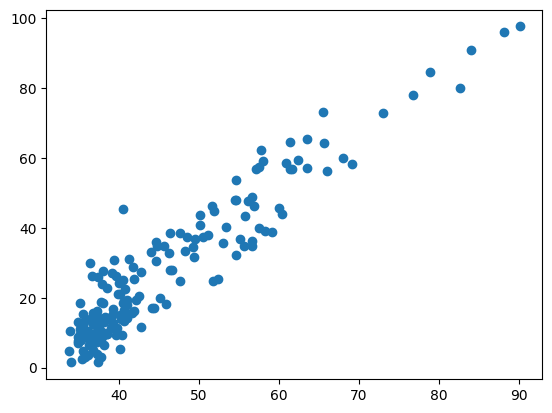

In [ ]:
plt.scatter(data['score_2022'],data['rpc_2022'])

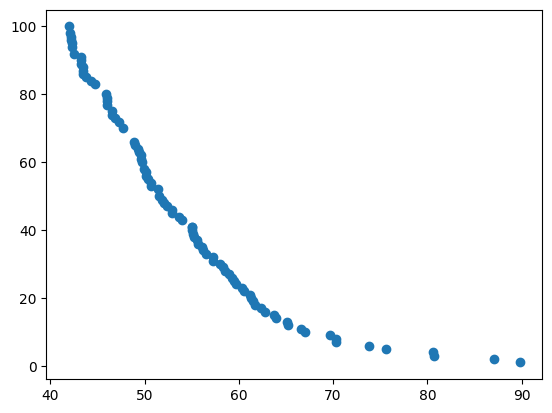

In [ ]:
plt.scatter(data['score_2023'],data['rank_2023'])

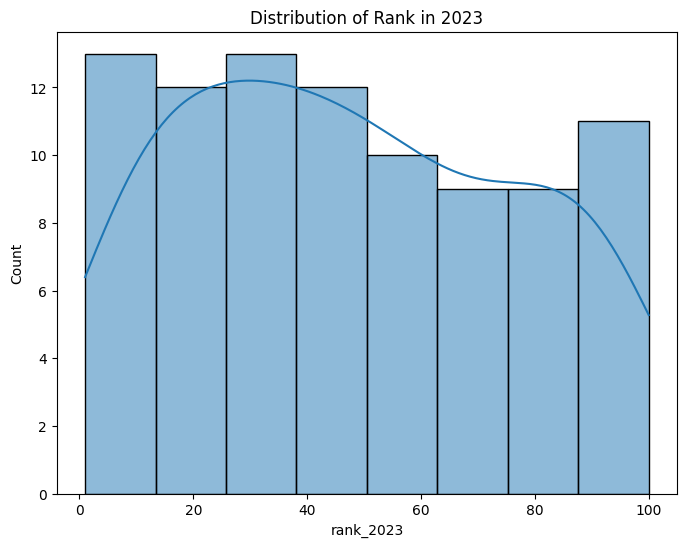

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['rank_2023'], kde=True)
plt.title('Distribution of Rank in 2023')
plt.show()

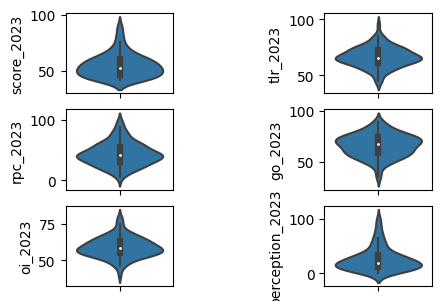

<Figure size 3000x3000 with 0 Axes>

In [ ]:
i=3
for attr in range(len(attributes2023)-1):
  plt.subplot(4,4,i)
  sns.violinplot(y=data[attributes2023[attr+1]])
  i=i+2

plt.subplot(4,4,1)
sns.violinplot(y=data['score_2023'])
plt.figure(figsize=(30,30))
plt.show()



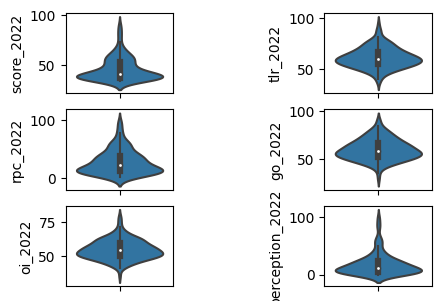

<Figure size 3000x3000 with 0 Axes>

In [ ]:
i=3
for attr in range(len(attributes2022)-1):
  plt.subplot(4,4,i)
  sns.violinplot(y=data[attributes2022[attr+1]])
  i=i+2

plt.subplot(4,4,1)
sns.violinplot(y=data['score_2022'])
plt.figure(figsize=(30,30))
plt.show()

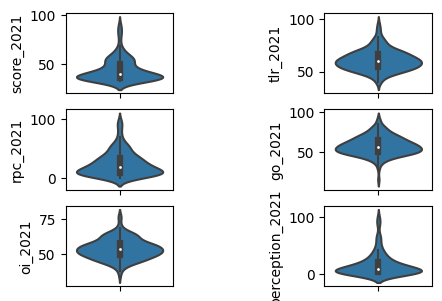

<Figure size 3000x3000 with 0 Axes>

In [ ]:
i=3
for attr in range(len(attributes2021)-1):
  plt.subplot(4,4,i)
  sns.violinplot(y=data[attributes2021[attr+1]])
  i=i+2

plt.subplot(4,4,1)
sns.violinplot(y=data['score_2021'])
plt.figure(figsize=(30,30))
plt.show()

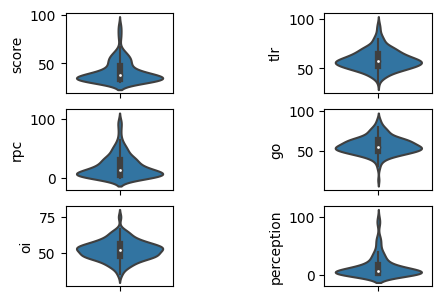

<Figure size 3000x3000 with 0 Axes>

In [ ]:
i=3
for attr in range(len(attributes2020)-1):
  plt.subplot(4,4,i)
  sns.violinplot(y=data2[attributes2020[attr+1]])
  i=i+2

plt.subplot(4,4,1)
sns.violinplot(y=data2['score'])
plt.figure(figsize=(30,30))
plt.show()

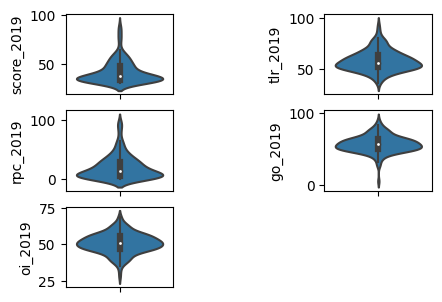

<Figure size 3000x3000 with 0 Axes>

In [ ]:
i=3
for attr in range(len(attributes2019)-1):
  plt.subplot(4,4,i)
  sns.violinplot(y=data[attributes2019[attr+1]])
  i=i+2

plt.subplot(4,4,1)
sns.violinplot(y=data['score_2019'])
plt.figure(figsize=(30,30))
plt.show()

In [ ]:
numpy1 = data.to_numpy()
iit = []
nit = []
other = []
for i in numpy1:
  for j in i:
    if isinstance(j, str):
      if 'Indian Institute of Technology' in j:
        iit.append(i)
      elif 'National Institute of Technology' in j:
        nit.append(i)
      else:
        other.append(i)
iitpd = pd.DataFrame(iit, columns = list(data))
nitpd = pd.DataFrame(nit, columns = list(data))
otherpd = pd.DataFrame(other, columns = list(data))

In [ ]:
iitstats = []
iitstats.append(iitpd['score_2023'].describe())
for attr in attributes2023:
  iitstats.append(iitpd[attr].describe())

iitstats

[count    17.000000
 mean     68.379412
 std      11.365481
 min      52.420000
 25%      60.510000
 50%      63.930000
 75%      75.640000
 max      89.790000
 Name: score_2023, dtype: float64,
 count    17.000000
 mean     16.058824
 std      14.179521
 min       1.000000
 25%       5.000000
 50%      14.000000
 75%      22.000000
 max      47.000000
 Name: rank_2023, dtype: float64,
 count    17.000000
 mean     74.192353
 std      10.765223
 min      56.930000
 25%      66.370000
 50%      75.900000
 75%      82.800000
 max      95.190000
 Name: tlr_2023, dtype: float64,
 count    17.000000
 mean     64.314706
 std      19.710479
 min      37.350000
 25%      44.530000
 50%      61.120000
 75%      78.360000
 max      96.410000
 Name: rpc_2023, dtype: float64,
 count    17.000000
 mean     78.620588
 std       6.519277
 min      68.860000
 25%      72.920000
 50%      79.300000
 75%      84.680000
 max      88.990000
 Name: go_2023, dtype: float64,
 count    17.000000
 mean     60.

In [ ]:
nitstats = []
nitstats.append(nitpd['score_2023'].describe())
for attr in attributes2023:
  nitstats.append(nitpd[attr].describe())

nitstats

[count    20.000000
 mean     53.111500
 std       7.647848
 min      42.280000
 25%      47.585000
 50%      52.370000
 75%      56.770000
 max      69.710000
 Name: score_2023, dtype: float64,
 count    20.000000
 mean     50.700000
 std      26.825165
 min       9.000000
 25%      33.500000
 50%      47.500000
 75%      70.500000
 max      95.000000
 Name: rank_2023, dtype: float64,
 count    20.000000
 mean     63.795000
 std       7.061891
 min      54.030000
 25%      57.627500
 50%      63.500000
 75%      69.130000
 max      74.030000
 Name: tlr_2023, dtype: float64,
 count    20.000000
 mean     42.070000
 std      11.533062
 min      20.620000
 25%      35.760000
 50%      40.875000
 75%      50.960000
 max      61.710000
 Name: rpc_2023, dtype: float64,
 count    20.000000
 mean     67.838000
 std       7.890386
 min      53.370000
 25%      60.775000
 50%      68.330000
 75%      74.267500
 max      78.820000
 Name: go_2023, dtype: float64,
 count    20.000000
 mean     58.

In [ ]:
otherstats = []
otherstats.append(otherpd['score_2023'].describe())
for attr in attributes2023:
  otherstats.append(otherpd[attr].describe())

otherstats

[count    408.000000
 mean      54.482892
 std       10.048340
 min       41.930000
 25%       46.580000
 50%       52.635000
 75%       59.565000
 max       89.790000
 Name: score_2023, dtype: float64,
 count    408.000000
 mean      48.720588
 std       28.802647
 min        1.000000
 25%       24.750000
 50%       46.500000
 75%       74.000000
 max      100.000000
 Name: rank_2023, dtype: float64,
 count    408.000000
 mean      66.520539
 std        8.749852
 min       44.650000
 25%       61.490000
 50%       65.910000
 75%       72.600000
 max       95.190000
 Name: tlr_2023, dtype: float64,
 count    408.000000
 mean      43.245956
 std       18.602414
 min        5.700000
 25%       30.780000
 50%       41.130000
 75%       54.590000
 max       96.410000
 Name: rpc_2023, dtype: float64,
 count    408.000000
 mean      65.681348
 std       10.894942
 min       34.860000
 25%       58.180000
 50%       66.890000
 75%       73.200000
 max       88.990000
 Name: go_2023, dtype: fl

In [ ]:
#conifdence intervals
iitstats = iitpd.describe()

st.t.interval(alpha=0.95, df=len(iitpd['score_2023'])-1,
              loc=iitstats['score_2023']['mean'],
              scale=st.sem(iitpd['score_2023']))

<ipython-input-77-703b53e3bbe1>:4: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df=len(iitpd['score_2023'])-1,


(62.53582070577144, 74.22300282364034)

In [ ]:
#conifdence intervals
nitstats = nitpd.describe()

st.t.interval(alpha=0.95, df=len(nitpd['score_2023'])-1,
              loc=nitstats['score_2023']['mean'],
              scale=st.sem(nitpd['score_2023']))

<ipython-input-78-215ed2e70636>:4: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df=len(nitpd['score_2023'])-1,


(nan, nan)

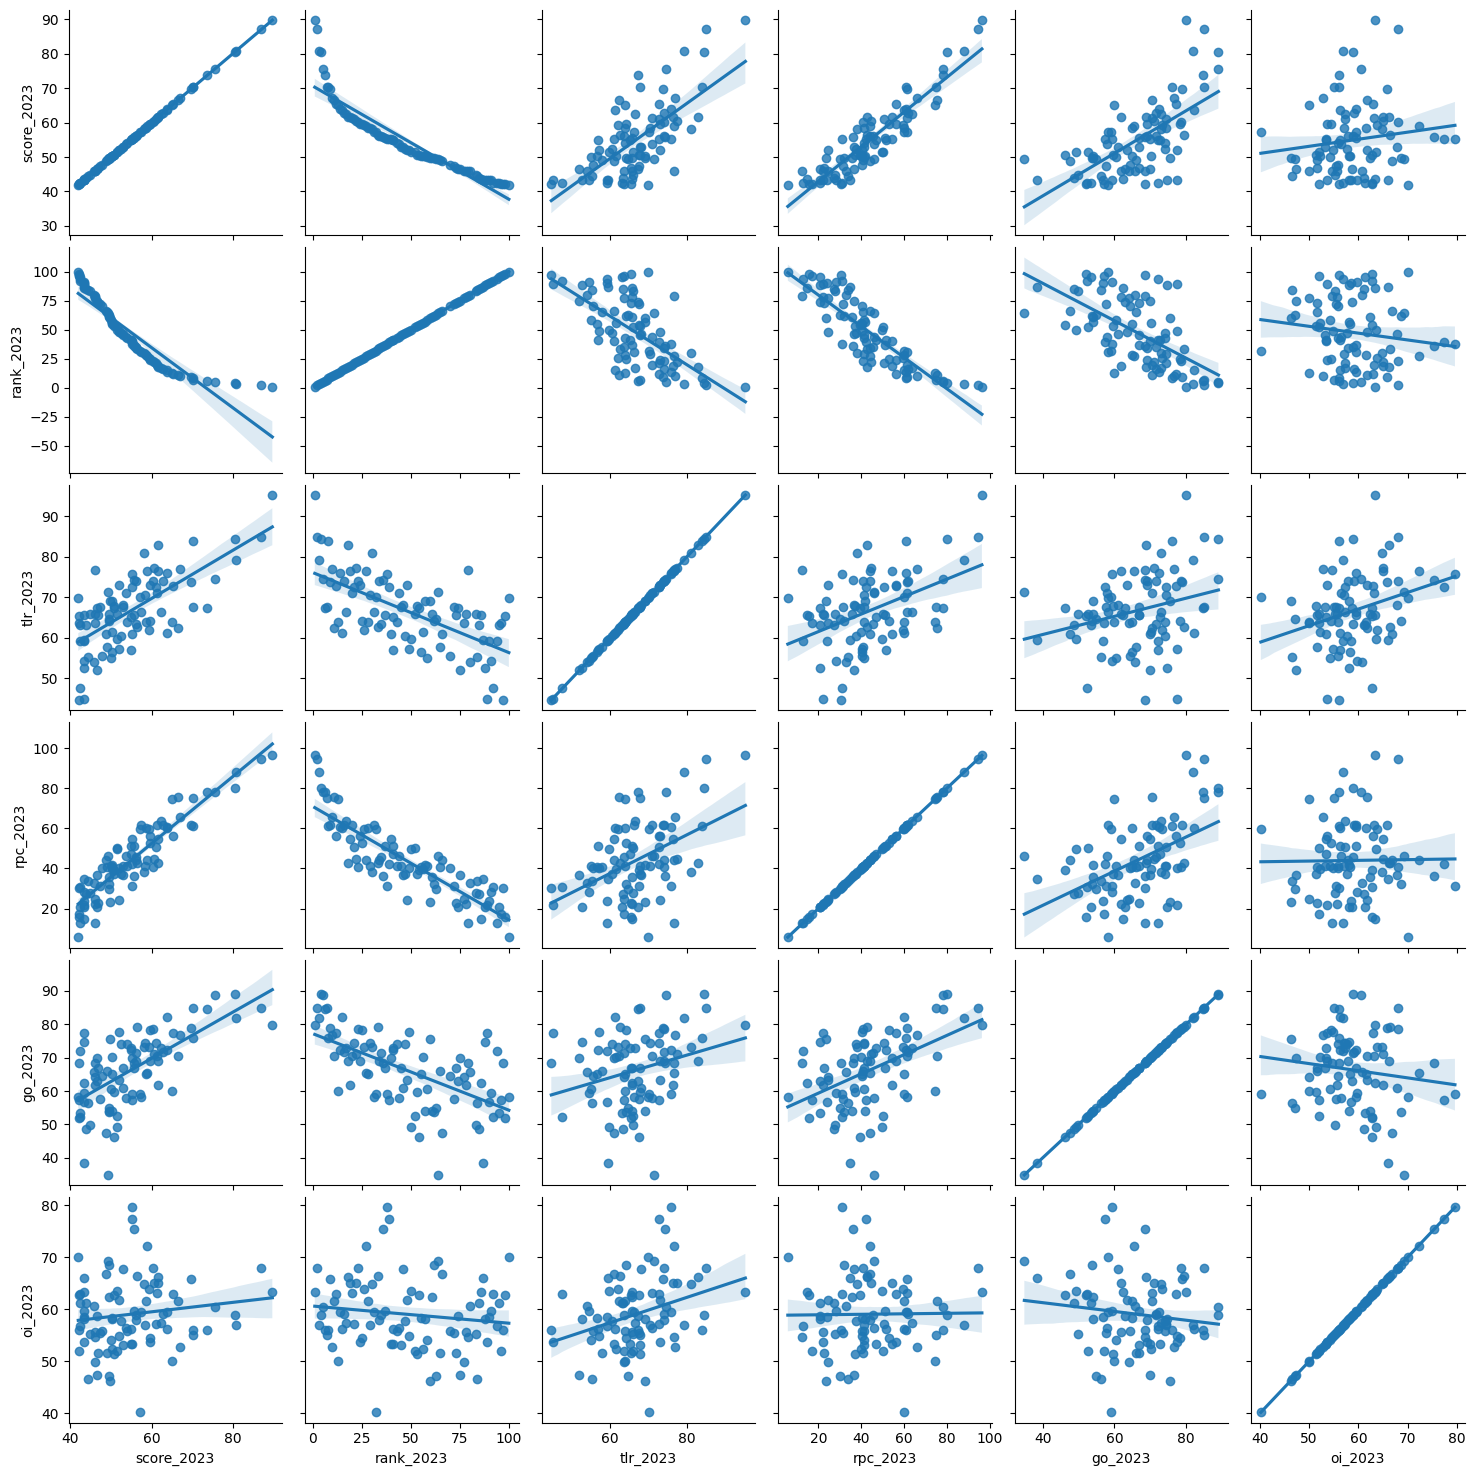

In [ ]:
sns.pairplot(data[['score_2023', 'rank_2023', 'tlr_2023', 'rpc_2023', 'go_2023', 'oi_2023']],diag_kind=None,kind='reg')
plt.show()

In [ ]:
iitpd.describe()

,score_2023,rank_2023,tlr_2023,rpc_2023,go_2023,oi_2023,perception_2023,score_2022,rank_2022,tlr_2022,...,go_2019,oi_2019,perception_2019,tlr_2020,rpc_2020,go_2020,oi_2020,perception_2020,score_2020,rank
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,68.379412,16.058824,74.192353,64.314706,78.620588,60.193529,50.831176,69.166471,14.352941,78.412941,...,73.021176,56.069412,50.071176,79.762941,60.106471,73.852353,57.760000,54.844118,67.992941,14.705882
std,11.365481,14.179521,10.765223,19.710479,6.519277,4.402614,27.490367,11.981855,11.285728,7.942951,...,9.742645,7.002195,29.630688,8.396244,24.548668,10.473794,4.008309,28.924918,13.637491,13.746657
min,52.420000,1.000000,56.930000,37.350000,68.860000,54.950000,11.700000,55.110000,1.000000,62.620000,...,56.260000,38.120000,6.860000,64.020000,26.190000,55.150000,49.990000,8.050000,46.130000,1.000000
25%,60.510000,5.000000,66.370000,44.530000,72.920000,56.160000,24.950000,59.160000,5.000000,75.760000,...,65.030000,53.160000,25.540000,77.050000,37.170000,67.110000,55.980000,30.750000,56.150000,5.000000
50%,63.930000,14.000000,75.900000,61.120000,79.300000,58.820000,50.090000,63.510000,13.000000,78.420000,...,71.710000,57.300000,47.420000,79.110000,53.310000,72.110000,57.760000,53.490000,62.880000,10.000000
75%,75.640000,22.000000,82.800000,78.360000,84.680000,64.850000,75.510000,78.890000,22.000000,81.060000,...,80.320000,60.100000,81.350000,83.760000,82.080000,83.030000,59.290000,85.780000,80.560000,24.000000
max,89.790000,47.000000,95.190000,96.410000,88.990000,67.920000,100.000000,90.040000,36.000000,94.620000,...,89.840000,65.650000,100.000000,95.420000,96.150000,89.650000,64.810000,100.000000,89.930000,53.000000


In [ ]:
nitpd.describe()

,score_2023,rank_2023,tlr_2023,rpc_2023,go_2023,oi_2023,perception_2023,score_2022,rank_2022,tlr_2022,...,go_2019,oi_2019,perception_2019,tlr_2020,rpc_2020,go_2020,oi_2020,perception_2020,score_2020,rank
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,24.000000,24.000000,24.000000,...,22.000000,22.000000,22.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,53.111500,50.700000,63.795000,42.070000,67.838000,58.342000,19.461500,49.505833,62.541667,62.071667,...,61.125909,49.138182,16.751364,60.826250,29.080833,61.966250,53.215833,18.241667,46.510417,63.791667
std,7.647848,26.825165,7.061891,11.533062,7.890386,4.929727,16.906992,9.233829,41.260550,7.780876,...,9.906503,8.050931,16.338838,7.648348,14.071846,10.332537,5.476104,16.451780,9.189307,46.483264
min,42.280000,9.000000,54.030000,20.620000,53.370000,51.560000,3.790000,35.490000,8.000000,47.420000,...,43.660000,28.020000,2.410000,45.320000,3.410000,39.360000,43.420000,1.630000,31.090000,9.000000
25%,47.585000,33.500000,57.627500,35.760000,60.775000,54.617500,6.260000,41.635000,33.500000,55.882500,...,55.445000,46.562500,6.065000,54.857500,20.062500,56.402500,49.497500,7.472500,39.807500,33.000000
50%,52.370000,47.500000,63.500000,40.875000,68.330000,57.825000,13.290000,48.530000,55.000000,61.775000,...,61.025000,49.945000,9.420000,59.295000,29.460000,61.975000,54.085000,11.130000,46.020000,53.000000
75%,56.770000,70.500000,69.130000,50.960000,74.267500,60.820000,26.812500,55.975000,82.000000,67.247500,...,66.330000,52.375000,23.415000,66.627500,39.000000,69.182500,57.030000,24.587500,52.877500,77.500000
max,69.710000,95.000000,74.030000,61.710000,78.820000,67.960000,67.980000,69.170000,171.000000,76.390000,...,77.010000,62.200000,63.540000,73.380000,57.820000,78.670000,63.870000,63.680000,64.100000,200.000000


In [ ]:
otherpd.describe()

,score_2023,rank_2023,tlr_2023,rpc_2023,go_2023,oi_2023,perception_2023,score_2022,rank_2022,tlr_2022,...,go_2019,oi_2019,perception_2019,tlr_2020,rpc_2020,go_2020,oi_2020,perception_2020,score_2020,rank
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,784.000000,784.000000,784.000000,...,836.000000,836.000000,836.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000
mean,54.482892,48.720588,66.520539,43.245956,65.681348,59.016961,25.147647,45.498316,92.289541,60.712640,...,56.364498,50.873122,13.572739,58.638530,19.382273,56.267904,51.735766,13.393639,41.174369,102.913452
std,10.048340,28.802647,8.749852,18.602414,10.894942,7.015815,20.514635,11.230133,54.148102,9.729426,...,11.193727,6.668733,18.523291,9.829368,19.160498,10.841389,6.864135,18.290266,11.159425,57.032238
min,41.930000,1.000000,44.650000,5.700000,34.860000,40.200000,0.400000,33.760000,1.000000,36.370000,...,5.460000,28.020000,0.000000,35.510000,0.460000,13.060000,33.800000,0.000000,31.090000,1.000000
25%,46.580000,24.750000,61.490000,30.780000,58.180000,54.570000,11.400000,37.390000,45.000000,54.720000,...,49.460000,46.820000,2.020000,52.260000,5.290000,49.400000,47.330000,2.160000,33.430000,54.500000
50%,52.635000,46.500000,65.910000,41.130000,66.890000,58.360000,19.100000,40.690000,91.000000,59.690000,...,55.880000,51.010000,5.440000,57.310000,12.430000,54.840000,51.770000,6.180000,37.100000,104.000000
75%,59.565000,74.000000,72.600000,54.590000,73.200000,63.070000,32.880000,51.730000,138.000000,66.410000,...,62.730000,55.575000,16.550000,64.130000,29.410000,63.060000,55.725000,17.055000,45.480000,152.000000
max,89.790000,100.000000,95.190000,96.410000,88.990000,79.560000,100.000000,90.040000,199.000000,94.620000,...,89.840000,68.500000,100.000000,95.420000,96.150000,89.650000,75.700000,100.000000,89.930000,200.000000


<ipython-input-61-13abb80611ba>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iitpd[attr])
<ipython-input-61-13abb80611ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nitpd[attr])
<ipython-input-61-13abb80611ba>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in

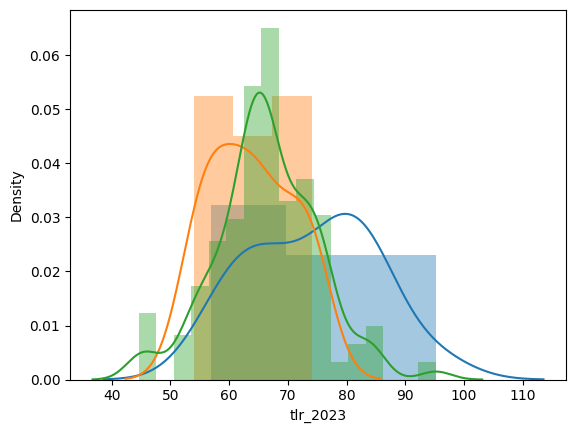

<ipython-input-61-13abb80611ba>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iitpd[attr])
<ipython-input-61-13abb80611ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nitpd[attr])
<ipython-input-61-13abb80611ba>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in

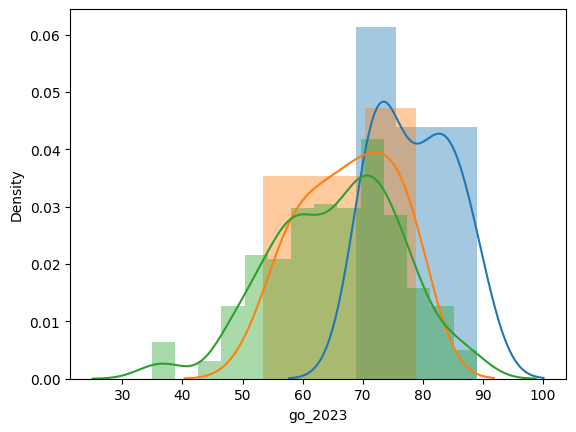

<ipython-input-61-13abb80611ba>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iitpd[attr])
<ipython-input-61-13abb80611ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nitpd[attr])
<ipython-input-61-13abb80611ba>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in

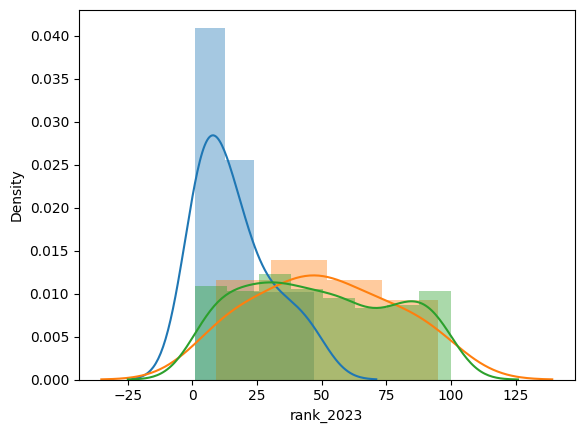

<ipython-input-61-13abb80611ba>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iitpd[attr])
<ipython-input-61-13abb80611ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nitpd[attr])
<ipython-input-61-13abb80611ba>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in

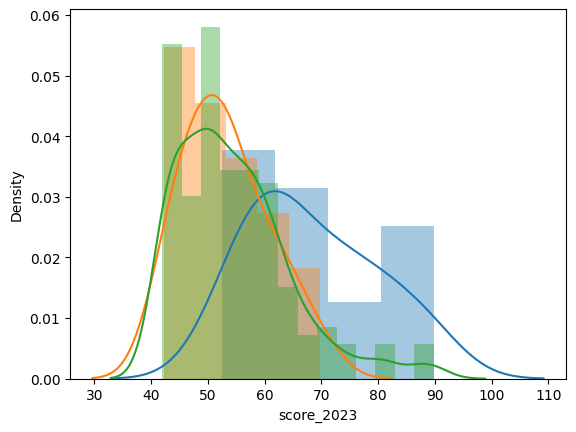

<ipython-input-61-13abb80611ba>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iitpd[attr])
<ipython-input-61-13abb80611ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nitpd[attr])
<ipython-input-61-13abb80611ba>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in

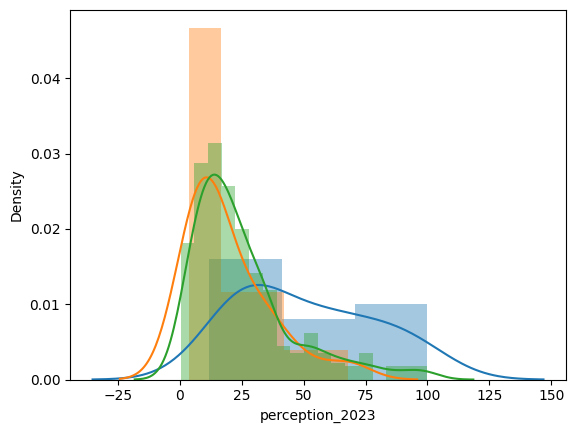

<ipython-input-61-13abb80611ba>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iitpd[attr])
<ipython-input-61-13abb80611ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nitpd[attr])
<ipython-input-61-13abb80611ba>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in

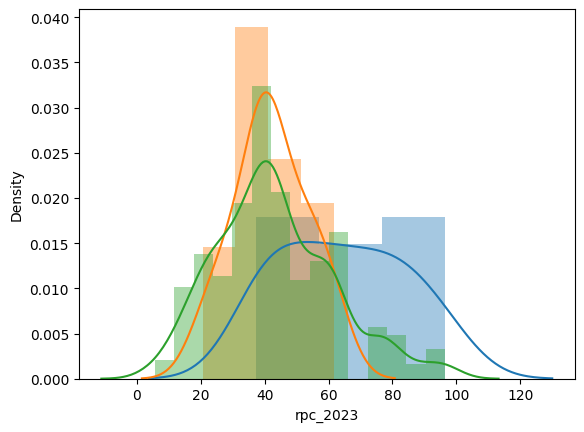

<ipython-input-61-13abb80611ba>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iitpd[attr])
<ipython-input-61-13abb80611ba>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(nitpd[attr])
<ipython-input-61-13abb80611ba>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in

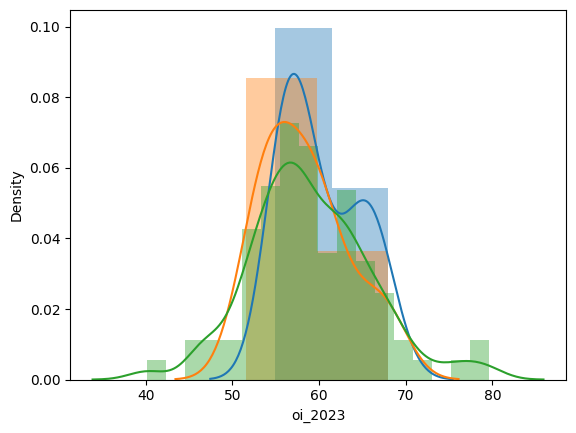

In [ ]:
#Comparison between IIT's, NIT's and OTHER Institutes

attributes = {'score_2023','rank_2023','tlr_2023','rpc_2023','go_2023','oi_2023','perception_2023'}
count = 1
for attr in attributes:
  sns.distplot(iitpd[attr])
  sns.distplot(nitpd[attr])
  sns.distplot(otherpd[attr])
  count=count+1
  plt.show()

Text(0.5, 0, 'RANK FOR ALL INSTITUTES')

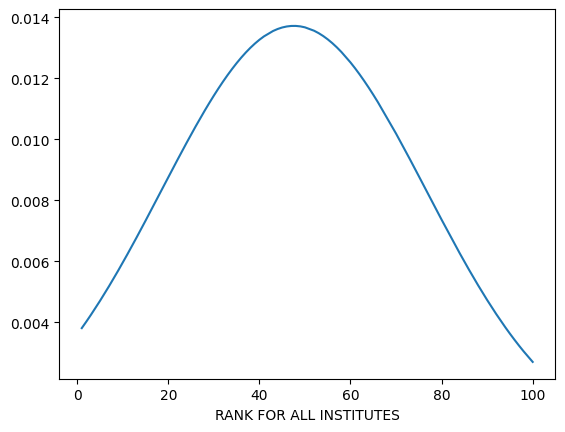

In [ ]:
from scipy.stats import norm
plt.plot(data['rank_2023'],norm.pdf(data['rank_2023'],summary['rank_2023']['mean'],summary['rank_2023']['std']))
plt.xlabel("RANK FOR ALL INSTITUTES")

Text(0.5, 0, 'RANK FOR IIT INSTITUTES')

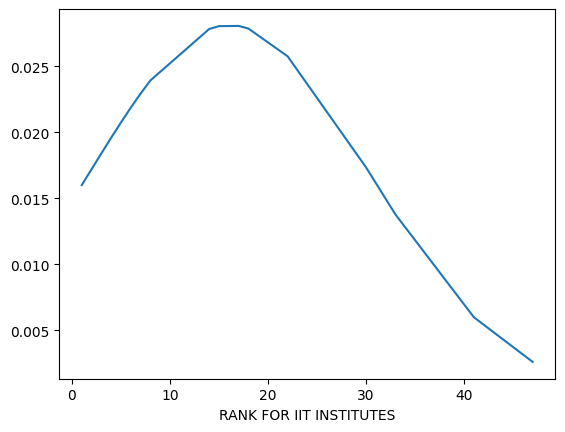

In [ ]:
from scipy.stats import norm
plt.plot(iitpd['rank_2023'],norm.pdf(iitpd['rank_2023'],iitstats['rank_2023']['mean'],iitstats['rank_2023']['std']))
plt.xlabel("RANK FOR IIT INSTITUTES")

Text(0.5, 0, 'RANK FOR NIT INSTITUTES')

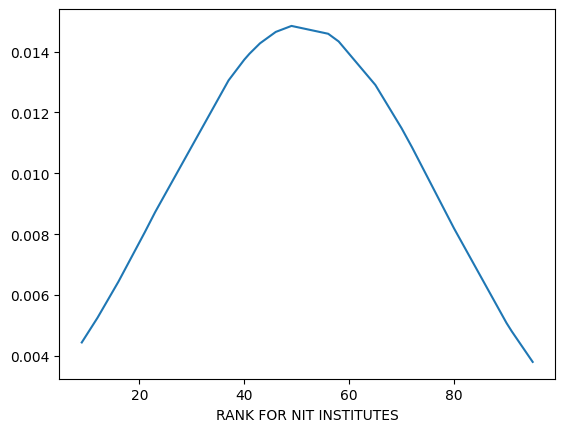

In [ ]:
from scipy.stats import norm
plt.plot(nitpd['rank_2023'],norm.pdf(nitpd['rank_2023'],nitstats['rank_2023']['mean'],nitstats['rank_2023']['std']))
plt.xlabel("RANK FOR NIT INSTITUTES")

In [ ]:
otherstats = otherpd.describe()
otherstats

,score_2023,rank_2023,tlr_2023,rpc_2023,go_2023,oi_2023,perception_2023,score_2022,rank_2022,tlr_2022,...,go_2019,oi_2019,perception_2019,tlr_2020,rpc_2020,go_2020,oi_2020,perception_2020,score_2020,rank
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,784.000000,784.000000,784.000000,...,836.000000,836.000000,836.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000,959.000000
mean,54.482892,48.720588,66.520539,43.245956,65.681348,59.016961,25.147647,45.498316,92.289541,60.712640,...,56.364498,50.873122,13.572739,58.638530,19.382273,56.267904,51.735766,13.393639,41.174369,102.913452
std,10.048340,28.802647,8.749852,18.602414,10.894942,7.015815,20.514635,11.230133,54.148102,9.729426,...,11.193727,6.668733,18.523291,9.829368,19.160498,10.841389,6.864135,18.290266,11.159425,57.032238
min,41.930000,1.000000,44.650000,5.700000,34.860000,40.200000,0.400000,33.760000,1.000000,36.370000,...,5.460000,28.020000,0.000000,35.510000,0.460000,13.060000,33.800000,0.000000,31.090000,1.000000
25%,46.580000,24.750000,61.490000,30.780000,58.180000,54.570000,11.400000,37.390000,45.000000,54.720000,...,49.460000,46.820000,2.020000,52.260000,5.290000,49.400000,47.330000,2.160000,33.430000,54.500000
50%,52.635000,46.500000,65.910000,41.130000,66.890000,58.360000,19.100000,40.690000,91.000000,59.690000,...,55.880000,51.010000,5.440000,57.310000,12.430000,54.840000,51.770000,6.180000,37.100000,104.000000
75%,59.565000,74.000000,72.600000,54.590000,73.200000,63.070000,32.880000,51.730000,138.000000,66.410000,...,62.730000,55.575000,16.550000,64.130000,29.410000,63.060000,55.725000,17.055000,45.480000,152.000000
max,89.790000,100.000000,95.190000,96.410000,88.990000,79.560000,100.000000,90.040000,199.000000,94.620000,...,89.840000,68.500000,100.000000,95.420000,96.150000,89.650000,75.700000,100.000000,89.930000,200.000000


Text(0.5, 0, 'RANK FOR OTHER INSTITUTES')

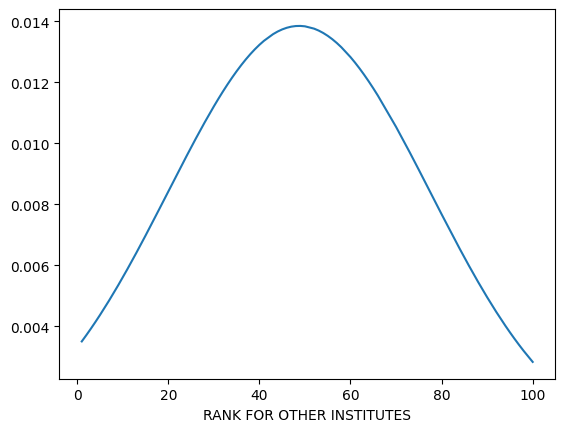

In [ ]:
from scipy.stats import norm
plt.plot(otherpd['rank_2023'],norm.pdf(otherpd['rank_2023'],otherstats['rank_2023']['mean'],otherstats['rank_2023']['std']))
plt.xlabel("RANK FOR OTHER INSTITUTES")

In [ ]:
#conifdence intervals
stats = data.describe()

st.t.interval(alpha=0.90, df=len(data['score_2023']),
              loc=summary['score_2023']['mean'],
              scale=st.sem(data['score_2023']))

<ipython-input-79-3a059cb9182c>:4: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.90, df=len(data['score_2023']),


(nan, nan)

In [ ]:
iitstats = iitpd.describe()

In [ ]:
st.t.interval(alpha=0.95, df=len(iitpd['score_2023'])-1,
              loc=iitstats['score_2023']['mean'],
              scale=st.sem(iitpd['score_2023']))

<ipython-input-97-650da48939df>:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df=len(iitpd['score_2023'])-1,


(62.53582070577144, 74.22300282364034)

In [ ]:
summary

,score_2023,rank_2023,tlr_2023,rpc_2023,go_2023,oi_2023,perception_2023,score_2022,rank_2022,tlr_2022,...,go_2019,oi_2019,perception_2019,tlr_2020,rpc_2020,go_2020,oi_2020,perception_2020,score_2020,rank
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,165.000000,165.000000,165.000000,...,175.000000,175.000000,175.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,54.952135,47.561798,66.691124,43.997978,66.272584,59.031573,25.873258,46.102606,89.818182,61.116909,...,56.807829,50.930457,14.361771,59.050150,20.307350,56.70360,51.873700,14.214650,41.758350,100.475000
std,10.389580,29.082545,8.931284,18.884078,10.970767,6.881734,21.343242,11.718970,54.732417,9.985212,...,11.409216,6.763845,19.430879,10.152778,19.937026,11.10281,6.853437,19.262625,11.725059,57.866936
min,41.930000,1.000000,44.650000,5.700000,34.860000,40.200000,0.400000,33.760000,1.000000,36.370000,...,5.460000,28.020000,0.000000,35.510000,0.460000,13.06000,33.800000,0.000000,31.090000,1.000000
25%,46.890000,23.000000,61.490000,31.040000,58.280000,54.780000,11.400000,37.490000,42.000000,54.790000,...,49.670000,46.975000,2.020000,52.535000,5.397500,50.11250,47.360000,2.557500,33.522500,50.750000
50%,52.880000,45.000000,65.910000,41.200000,66.940000,58.360000,19.100000,40.780000,88.000000,60.110000,...,56.190000,51.040000,5.800000,57.525000,13.350000,55.07000,51.855000,6.650000,37.560000,100.500000
75%,60.280000,73.000000,72.800000,56.090000,74.140000,63.070000,33.060000,53.060000,136.000000,66.650000,...,63.270000,55.675000,17.515000,64.392500,30.642500,63.09500,56.002500,17.790000,46.775000,150.250000
max,89.790000,100.000000,95.190000,96.410000,88.990000,79.560000,100.000000,90.040000,199.000000,94.620000,...,89.840000,68.500000,100.000000,95.420000,96.150000,89.65000,75.700000,100.000000,89.930000,200.000000


In [ ]:
st.t.interval(alpha=0.95, df=len(data['score_2022'])-1,
              loc=summary['score_2022']['mean'],
              scale=st.sem(data['score_2022']))

<ipython-input-107-2f036a4990dc>:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df=len(data['score_2022'])-1,


(nan, nan)

In [ ]:
nitstats = nitpd.describe()

In [ ]:
st.t.interval(alpha=0.95,df=len(nitpd['score_2022']),
              loc=nitstats['score_2022']['mean'],
              scale=st.sem(nitpd['score_2022']))

<ipython-input-104-12ed2f6ea295>:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95,df=len(nitpd['score_2022']),


(45.6156995578896, 53.39596710877706)

In [ ]:
lower = summary['rank_2023']['mean'] - 2*summary['rank_2023']['std']
higher = summary['rank_2023']['mean'] + 2*summary['rank_2023']['std']
print(lower,higher)

-10.603292571026842 105.72688807664481


,score_2023,rank_2023,tlr_2023,rpc_2023,go_2023,oi_2023,perception_2023,score_2022,rank_2022,tlr_2022,...,go_2019,oi_2019,perception_2019,tlr_2020,rpc_2020,go_2020,oi_2020,perception_2020,score_2020,rank
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,165.000000,165.000000,165.000000,...,175.000000,175.000000,175.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000
mean,54.952135,47.561798,66.691124,43.997978,66.272584,59.031573,25.873258,46.102606,89.818182,61.116909,...,56.807829,50.930457,14.361771,59.050150,20.307350,56.70360,51.873700,14.214650,41.758350,100.475000
std,10.389580,29.082545,8.931284,18.884078,10.970767,6.881734,21.343242,11.718970,54.732417,9.985212,...,11.409216,6.763845,19.430879,10.152778,19.937026,11.10281,6.853437,19.262625,11.725059,57.866936
min,41.930000,1.000000,44.650000,5.700000,34.860000,40.200000,0.400000,33.760000,1.000000,36.370000,...,5.460000,28.020000,0.000000,35.510000,0.460000,13.06000,33.800000,0.000000,31.090000,1.000000
25%,46.890000,23.000000,61.490000,31.040000,58.280000,54.780000,11.400000,37.490000,42.000000,54.790000,...,49.670000,46.975000,2.020000,52.535000,5.397500,50.11250,47.360000,2.557500,33.522500,50.750000
50%,52.880000,45.000000,65.910000,41.200000,66.940000,58.360000,19.100000,40.780000,88.000000,60.110000,...,56.190000,51.040000,5.800000,57.525000,13.350000,55.07000,51.855000,6.650000,37.560000,100.500000
75%,60.280000,73.000000,72.800000,56.090000,74.140000,63.070000,33.060000,53.060000,136.000000,66.650000,...,63.270000,55.675000,17.515000,64.392500,30.642500,63.09500,56.002500,17.790000,46.775000,150.250000
max,89.790000,100.000000,95.190000,96.410000,88.990000,79.560000,100.000000,90.040000,199.000000,94.620000,...,89.840000,68.500000,100.000000,95.420000,96.150000,89.65000,75.700000,100.000000,89.930000,200.000000


In [ ]:
result = data.loc[data['perception_2022'] == 100, :]
print(result.values)

[['IR-E-U-0456' 89.79 1.0 95.19 96.41 79.89 63.26 100.0 90.04 1.0 94.62
  97.66 80.42 62.85 100.0 90.19 1.0 95.47 96.43 81.92 62.44 100.0 89.93
  1.0 95.42 94.64 83.9 61.31 100.0 89.05 1.0 93.55 92.39 84.36 63.99
  100.0 'Indian Institute of Technology Madras'
  'https://nirfcdn.azureedge.net/2020/pdf/Engineering/IR-E-U-0456.pdf'
  95.42 94.64 83.9 61.31 100.0 'Chennai' 'Tamil Nadu' 89.93 1]]
